# Decision Trees and Random Forests in Python


**Objectives**


1. Explore and analyze data using a Pairplot
2. Train a single Decision Tree
3. Predict and evaluate the Decision Tree
4. Compare the Decision Tree model to a Random Forest


## Introduction

Explore and analyze data using a Pairplot, train a single Decision Tree, predict and evaluate the Decision Tree, and compare the Decision Tree model to a Random Forest.  Recall that the [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm belongs to the family of supervised learning algorithms.
Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving both regression and classification problems too.  Simply, the goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In [1]:
# Here we'll import Pandas and Numpy data processing libraries
import pandas as pd
import numpy as np
# Use matplotlib for visualizing the model
import matplotlib.pyplot as plt
# Use seaborn for data visualization
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
# Reading "kyphosis.csv" file using the read_csv() function included in the pandas library
df = pd.read_csv('kyphosis.csv')

In [3]:
# Output the first five rows
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


## Exploratory Data Analysis

We'll just check out a simple pairplot for this small dataset.

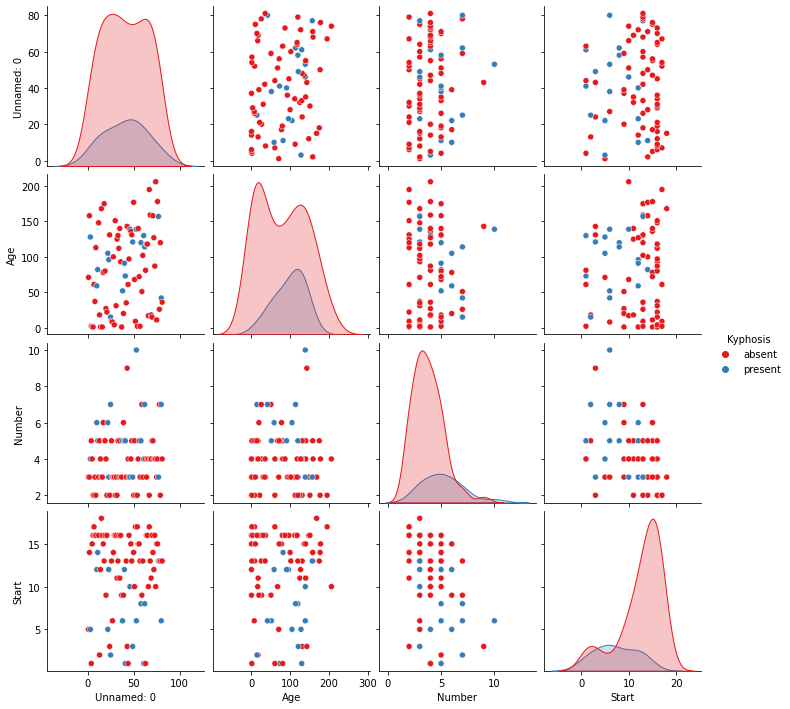

In [4]:
# Here we are using the pairplot() function to plot multiple pairwise bivariate distributions in a dataset
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

In [6]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Remove column name 'Kyphosis'
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

# Let's split up the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [7]:
# Import Decision Tree Classifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

Let's evaluate our decision tree.

In [8]:
# Predict the response for test dataset
predictions = dtree.predict(X_test)

# Importing the classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

# Here we will build a text report showing the main classification metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.84      0.86        19
     present       0.57      0.67      0.62         6

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



In [9]:
# Now we can compute confusion matrix to evaluate the accuracy of a classification
print(confusion_matrix(y_test,predictions))

[[16  3]
 [ 2  4]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [18]:
# Here we are importing some built-in visualization functionalities for decision trees
from IPython.display import Image
#from sklearn.externals.six import StringIO
import six
import sys
from six import StringIO
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Kyphosis', 'Age', 'Number', 'Start']

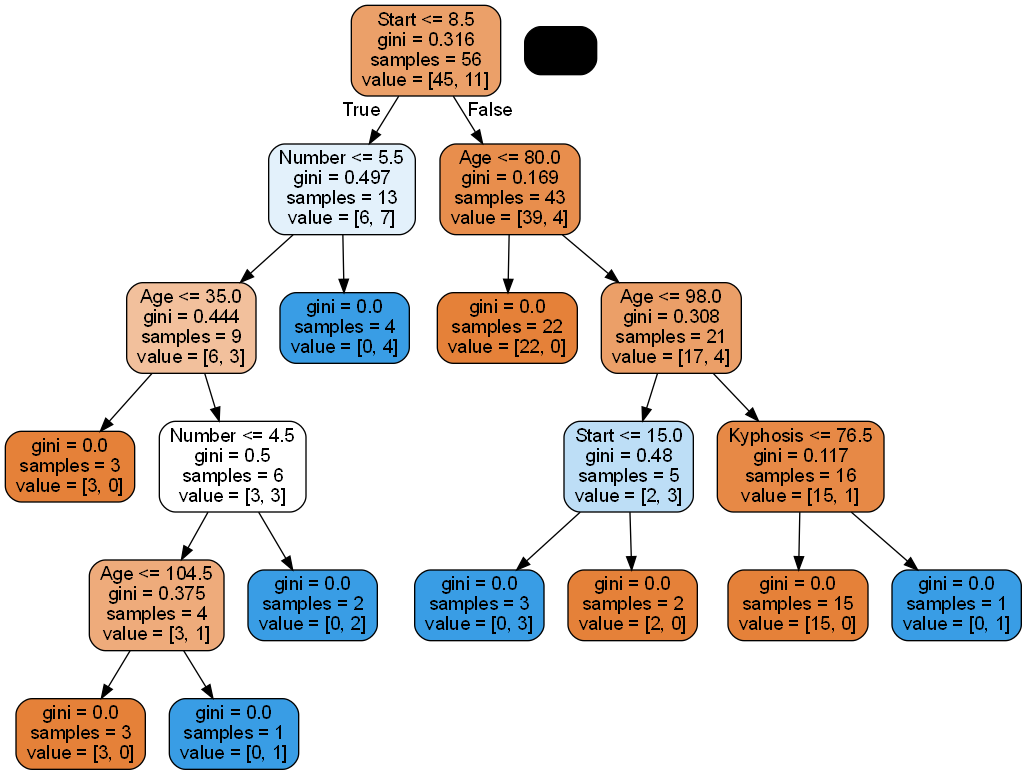

In [19]:
# Now we are ready to visualize our Decision Tree model
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests

Now let's compare the decision tree model to a random forest.

In [20]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train Random Forest Classifer
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Train model using the training sets
rfc_pred = rfc.predict(X_test)

In [22]:
# Now we can compute confusion matrix to evaluate the accuracy
print(confusion_matrix(y_test,rfc_pred))

[[15  4]
 [ 4  2]]


In [23]:
# Finally we will build a text report showing the main metrics
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        19
     present       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25

